In [3]:
import sys
import importlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
from src.dataLoaders.PatientDataLoader import PatientDataProcessor
importlib.reload(sys.modules['src.dataLoaders.PatientDataLoader'])

<module 'src.dataLoaders.PatientDataLoader' from '/Users/mraabo/computer_science/year_3/bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/PatientDataLoader.py'>

In [5]:
meta_folder = 'OAIData21/'
data_path = '../datasets/meta_data/' + meta_folder

cartilage_featues = [
    "BLFMTH",    # Mean Cartilage Thickness (Central Lateral Femur) - 
    "BMFMTH",    # Mean Cartilage Thickness (Central Medial Femur)
    "WLTMTH",    # Mean Cartilage Thickness (Lateral Tibia)
    "WMTMTH",    # Mean Cartilage Thickness (Medial Tibia) - 
]

all_clinical_features = [
    "WOMKPR",   # WOMAC Pain score (0-20) Right
    "WOMKPL",   # WOMAC Pain score (0-20) Left
    "AGE",      # Age
]

processor = PatientDataProcessor(base_path=data_path)
data_duplicate_sex = processor.load_all_clinical_data()[["Sex", "V00WOMKPR", "V00WOMKPL", "V00AGE"]]
data = data_duplicate_sex.iloc[:, -4:]
data = data.rename(columns={'V00WOMKPR': 'WOMAC right', 'V00WOMKPL': 'WOMAC left', 'V00AGE': 'Age'})

# Summary Statistics

In [6]:
data.describe()

,Sex,WOMAC right,WOMAC left,Age
count,4796.000000,4793.000000,4796.000000,4796.000000
mean,0.584654,2.501878,2.334237,61.158465
std,0.492833,3.243312,3.408293,9.190120
min,0.000000,0.000000,0.000000,45.000000
25%,0.000000,0.000000,0.000000,53.000000
50%,1.000000,1.000000,1.000000,61.000000
75%,1.000000,4.000000,4.000000,69.000000
max,1.000000,20.000000,20.000000,79.000000


# Visualization

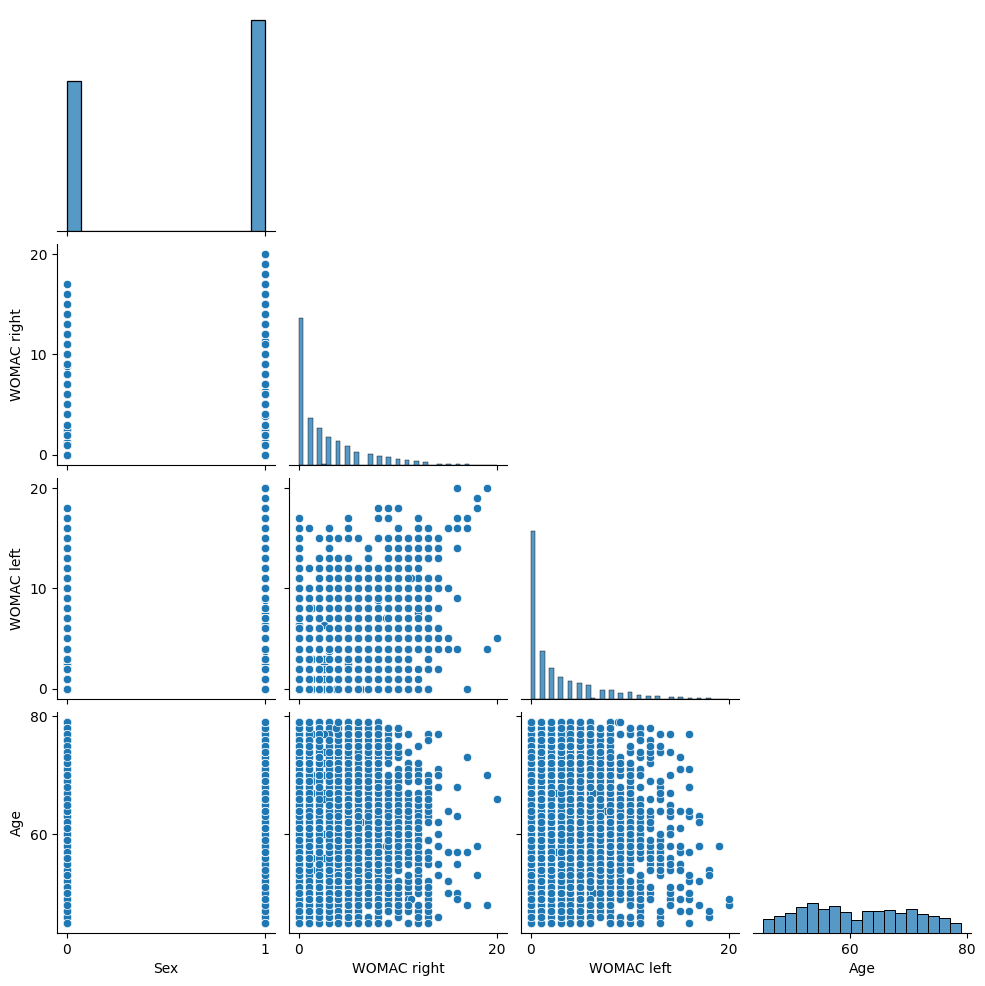

In [7]:
sns.pairplot(data, corner=True)
sns.set_context('notebook', font_scale=2)
plt.show()

# Correlation Analysis

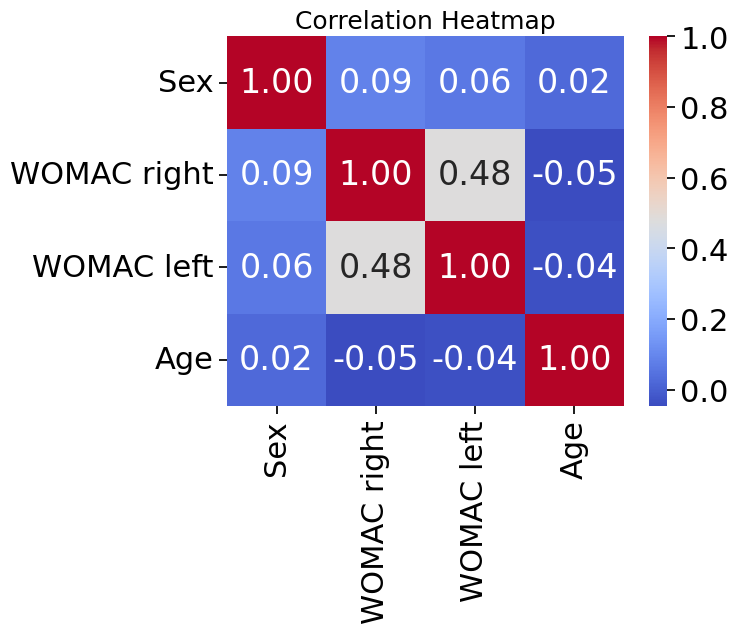

In [8]:
#plt.figure(figsize=(8, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
sns.set_context('notebook', font_scale=1.5)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
from scipy.stats import pearsonr

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

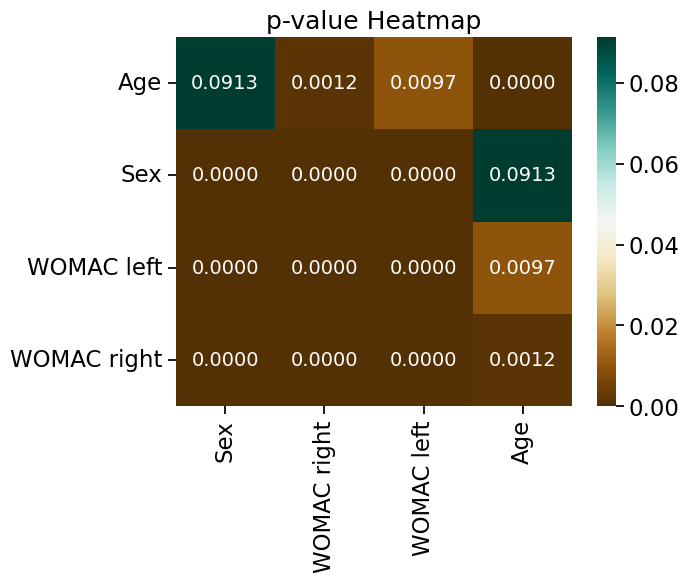

In [10]:
sns.heatmap(calculate_pvalues(data).astype(float), annot=True, annot_kws={"size": 14}, cmap='BrBG', fmt=".4f")
sns.set_context('notebook', font_scale=1.5)
plt.title('p-value Heatmap')
plt.show()

In [11]:
from sklearn.metrics import r2_score
r2_score(data['WOMAC right'], data['WOMAC left'])

ValueError: Input contains NaN.